In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Distrubition of Features

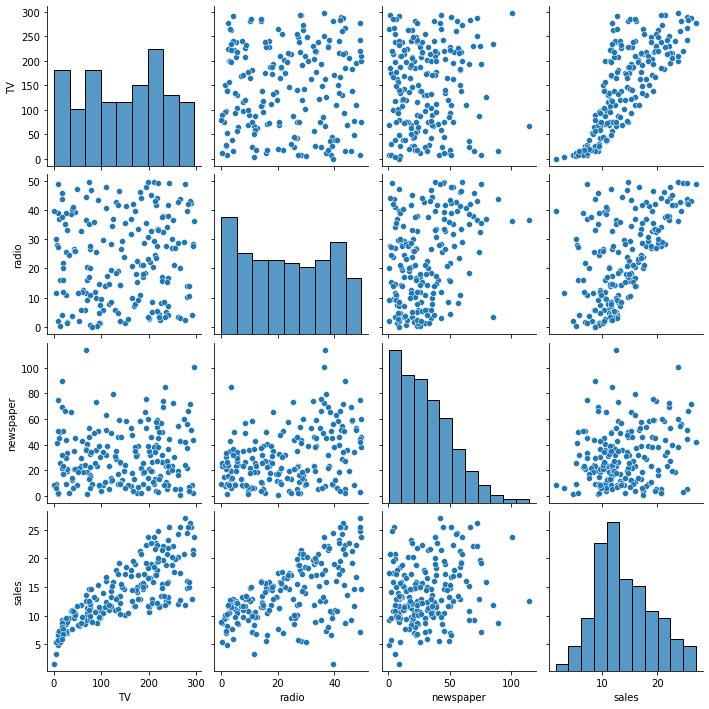

In [6]:
sns.pairplot(df);

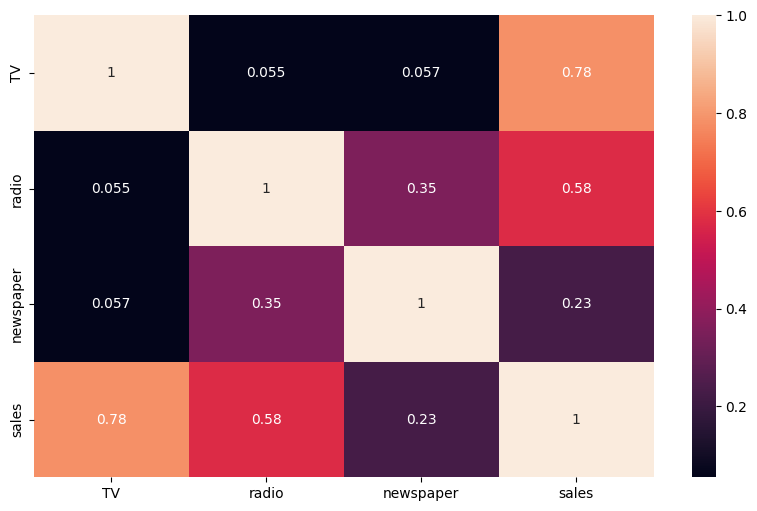

In [7]:
sns.heatmap(df.corr(),annot=True);

In [8]:
df["TotalSpend"] = df["TV"]+df["radio"]+df["newspaper"]
df.head()

,TV,radio,newspaper,sales,TotalSpend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [9]:
df = df.iloc[:,[0,1,2,4,3]]
df.head()

,TV,radio,newspaper,TotalSpend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


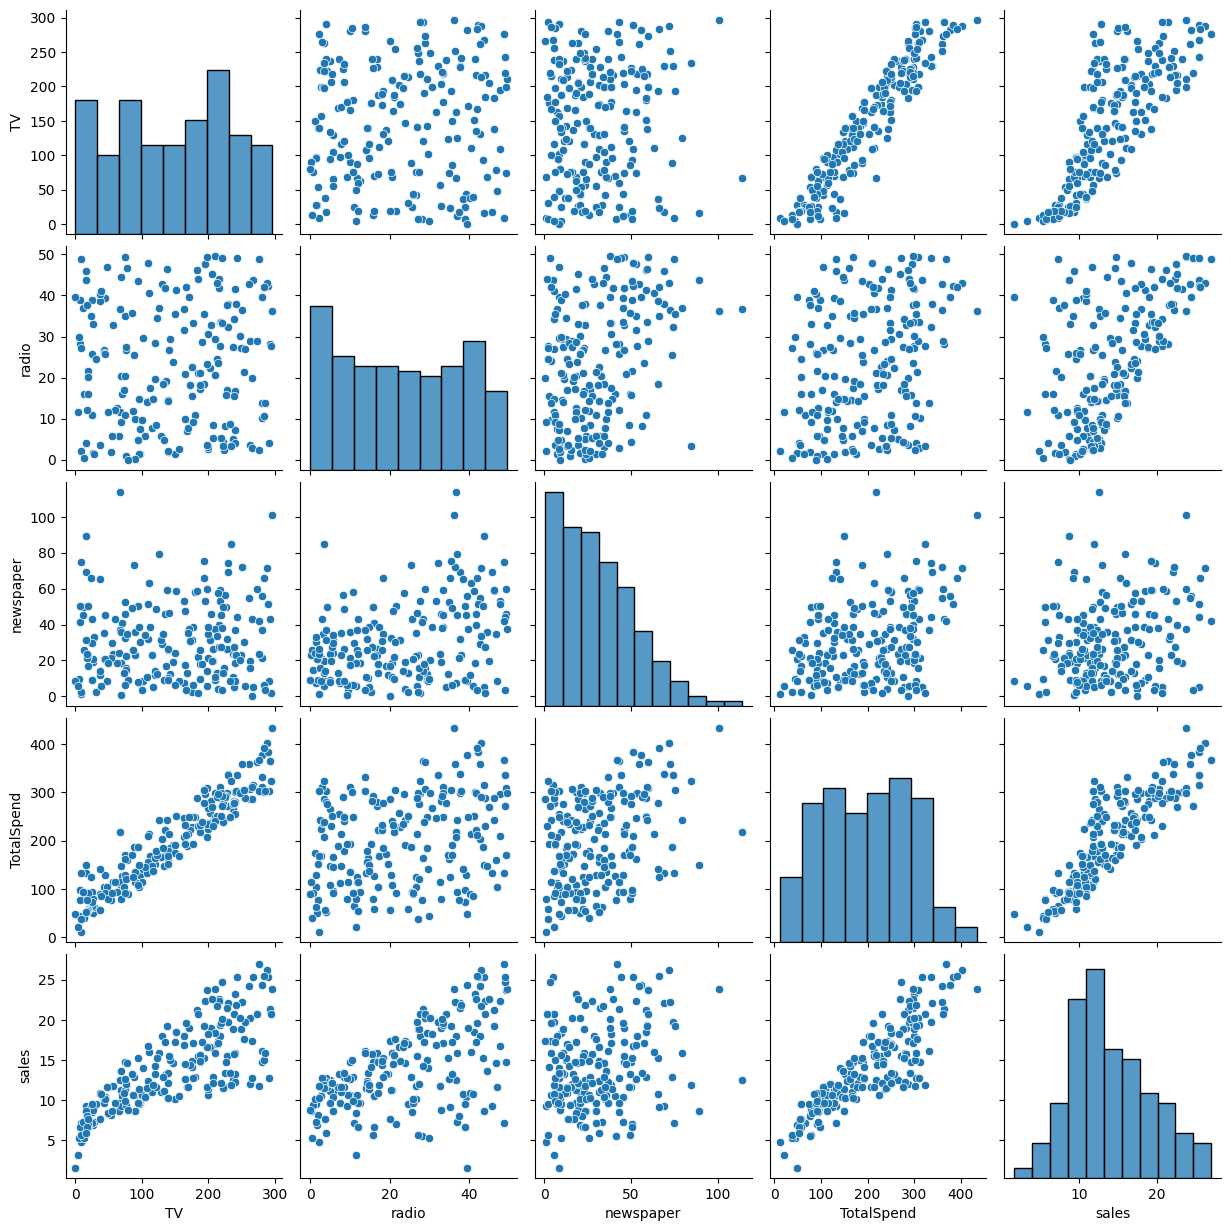

In [10]:
sns.pairplot(df);

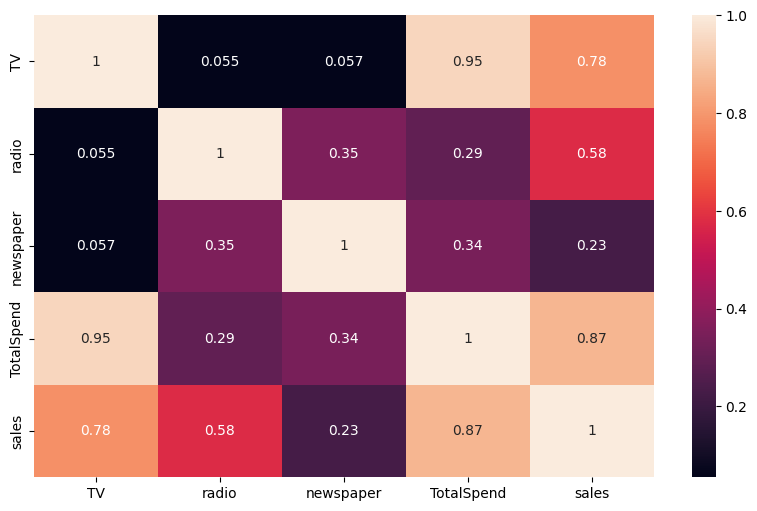

In [11]:
sns.heatmap(df.corr(),annot=True);

# Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop(columns="sales")
y=df.sales

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (160, 4)
Train target shape   :  (160,)
Test features shape  :  (40, 4)
Test target shape    :  (40,)


# Scaling the Data 

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
X_test_scaled = scaler.transform(X_test)

# Model Fitting and Compare Actual and Predicted Labels

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()

In [22]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [23]:
y_pred=model.predict(X_test_scaled)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [24]:
y_train_pred= model.predict(X_train_scaled)
y_train_pred

array([ 9.68827502, 12.67337707, 10.0553326 ,  8.20010235, 13.49562077,
        5.42585998,  9.2767456 , 14.14222434,  8.83116901, 11.63897134,
       15.42650259, 11.89014523, 12.82693587, 10.82735757,  6.58862301,
        9.93190159,  9.51414822, 24.0815284 ,  7.70552541, 12.49609325,
       17.71880786, 15.28339577, 11.42760282, 10.86633369, 16.78110726,
        6.93551369, 21.35732668,  6.16937955,  9.93897566, 11.52842846,
        9.29612342,  6.59177689, 14.90122344, 17.32216187, 15.80154544,
       16.28133624, 14.94912051, 19.55991189, 13.87795425, 21.04366162,
       12.62381325, 13.80024106,  8.96290787, 17.00702846,  8.41601918,
       15.28340432, 13.72169286, 23.2179245 , 12.53781447, 22.89655202,
        6.7146496 , 18.54942004, 23.38327322, 18.6439566 , 17.1342205 ,
       16.42698672, 12.44666834, 11.82149856, 16.94141141, 14.49733909,
       13.27071976,  7.69340245, 19.22784797,  9.63893927, 19.50751919,
       10.18954107,  7.09983872, 16.69074263, 13.75827407, 15.12

In [25]:
my_dict = {"Actual":y_test,"Predict": y_pred,"Residual":y_test-y_pred}

In [26]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Predict,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


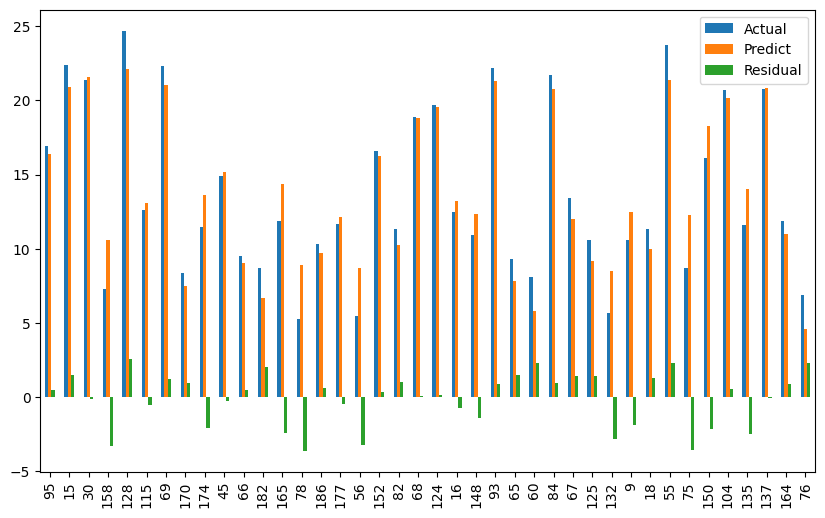

In [27]:
comparing.plot(kind="bar")
plt.show()

# Error Metrics

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [30]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.895701,0.899438
mae,1.198468,1.460757
mse,2.705129,3.174097
rmse,1.644728,1.781600


# CrossValidate


In [32]:
from sklearn.model_selection import cross_validate

In [33]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 
                                                            'neg_root_mean_squared_error'], cv = 5)

In [35]:
pd.DataFrame(scores,index=range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001000,0.001353,0.719815,-1.536340,-4.192954,-2.047670
2,0.000648,0.001001,0.931165,-0.928442,-1.474038,-1.214100
3,0.000000,0.001000,0.926528,-1.155980,-2.109080,-1.452267
4,0.001000,0.000000,0.918834,-1.299953,-2.541355,-1.594163
5,0.001000,0.000000,0.802342,-1.296306,-4.372931,-2.091155


In [36]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.859737
test_neg_mean_absolute_error       -1.243404
test_neg_mean_squared_error        -2.938071
test_neg_root_mean_squared_error   -1.679871
dtype: float64

In [38]:
ls

,linear_train,linear_test
R2,0.895701,0.899438
mae,1.198468,1.460757
mse,2.705129,3.174097
rmse,1.644728,1.781600


# ElasticNet

In [39]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [40]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio: 1: Lasso or 0:Ridge
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [41]:
y_pred= elastic_model.predict(X_test_scaled)
y_train_pred=elastic_model.predict(X_train_scaled)

In [42]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.797540,0.787724
mae,1.702838,2.042899
mse,5.251057,6.700183
rmse,2.291519,2.588471


# ElasticNet Cross Validation with Default HyperParameters

In [44]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [47]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.754919
test_neg_mean_absolute_error       -1.764820
test_neg_mean_squared_error        -5.633295
test_neg_root_mean_squared_error   -2.366144
dtype: float64

In [48]:
es

,elastic_train,elastic_test
R2,0.797540,0.787724
mae,1.702838,2.042899
mse,5.251057,6.700183
rmse,2.291519,2.588471


# Choosing best alpha and l1_ratio values with Cross-Validation

In [49]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [50]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [51]:
elastic_cv_model.fit(X_train_scaled,y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [52]:
elastic_cv_model.alpha_

0.01

In [53]:
elastic_cv_model.l1_ratio_

1.0

In [54]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred=elastic_cv_model.predict(X_train_scaled)

In [55]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.895692,0.899099
mae,1.199034,1.463657
mse,2.705365,3.184808
rmse,1.644799,1.784603


In [56]:
pd.concat([ls,es,ecs],axis=1)

,linear_train,linear_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.895701,0.899438,0.797540,0.787724,0.895692,0.899099
mae,1.198468,1.460757,1.702838,2.042899,1.199034,1.463657
mse,2.705129,3.174097,5.251057,6.700183,2.705365,3.184808
rmse,1.644728,1.781600,2.291519,2.588471,1.644799,1.784603


# GridSearch

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [59]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [60]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [61]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [62]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [63]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled) 

In [66]:
gs=train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gs

,GridSearch_train,GridSearch_test
R2,0.895692,0.899099
mae,1.199034,1.463657
mse,2.705365,3.184808
rmse,1.644799,1.784603


In [67]:
pd.concat([ls,es,ecs,gs],axis=1)

,linear_train,linear_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,GridSearch_train,GridSearch_test
R2,0.895701,0.899438,0.797540,0.787724,0.895692,0.899099,0.895692,0.899099
mae,1.198468,1.460757,1.702838,2.042899,1.199034,1.463657,1.199034,1.463657
mse,2.705129,3.174097,5.251057,6.700183,2.705365,3.184808,2.705365,3.184808
rmse,1.644728,1.781600,2.291519,2.588471,1.644799,1.784603,1.644799,1.784603


# Lasso

In [68]:
from sklearn.linear_model import Lasso, LassoCV

In [69]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [70]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [71]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.813820,0.793367
mae,1.628659,1.941698
mse,4.828798,6.522079
rmse,2.197453,2.553836


In [72]:
pd.concat([ls,es,ecs,gs,lss],axis=1)

,linear_train,linear_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,GridSearch_train,GridSearch_test,lasso_train,lasso_test
R2,0.895701,0.899438,0.797540,0.787724,0.895692,0.899099,0.895692,0.899099,0.813820,0.793367
mae,1.198468,1.460757,1.702838,2.042899,1.199034,1.463657,1.199034,1.463657,1.628659,1.941698
mse,2.705129,3.174097,5.251057,6.700183,2.705365,3.184808,2.705365,3.184808,4.828798,6.522079
rmse,1.644728,1.781600,2.291519,2.588471,1.644799,1.784603,1.644799,1.784603,2.197453,2.553836


#  For Lasso CV with Default Parameters

In [73]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [74]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001000,0.001472,0.696461,-1.410795,-4.542455,-2.131304
2,0.001001,0.000000,0.784440,-1.564758,-4.616015,-2.148491
3,0.001000,0.001000,0.805358,-1.929967,-5.587413,-2.363771
4,0.001000,0.000000,0.797580,-2.070817,-6.337880,-2.517515
5,0.000000,0.001000,0.763157,-1.518042,-5.239860,-2.289074


In [75]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.769399
test_neg_mean_absolute_error       -1.698876
test_neg_mean_squared_error        -5.264725
test_neg_root_mean_squared_error   -2.290031
dtype: float64

In [77]:
lss

,lasso_train,lasso_test
R2,0.813820,0.793367
mae,1.628659,1.941698
mse,4.828798,6.522079
rmse,2.197453,2.553836


<AxesSubplot:>

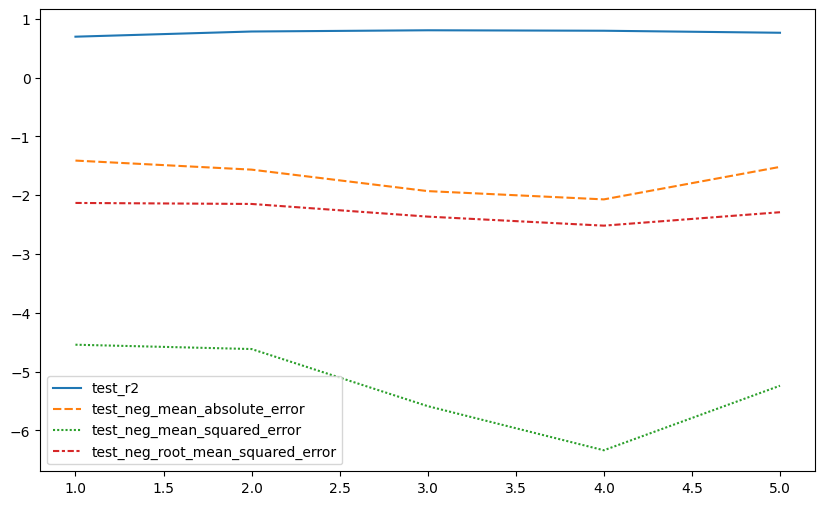

In [78]:
sns.lineplot(data = scores.iloc[:,2:])

# Choosing best alpha value with Cross-Validation

In [79]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 

In [80]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [81]:
lasso_cv_model.alpha_

0.01

In [82]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [83]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.895692,0.899099
mae,1.199034,1.463657
mse,2.705365,3.184808
rmse,1.644799,1.784603


In [84]:
pd.concat([ls,es,ecs,gs,lss,lcs],axis=1)

,linear_train,linear_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,GridSearch_train,GridSearch_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.895701,0.899438,0.797540,0.787724,0.895692,0.899099,0.895692,0.899099,0.813820,0.793367,0.895692,0.899099
mae,1.198468,1.460757,1.702838,2.042899,1.199034,1.463657,1.199034,1.463657,1.628659,1.941698,1.199034,1.463657
mse,2.705129,3.174097,5.251057,6.700183,2.705365,3.184808,2.705365,3.184808,4.828798,6.522079,2.705365,3.184808
rmse,1.644728,1.781600,2.291519,2.588471,1.644799,1.784603,1.644799,1.784603,2.197453,2.553836,1.644799,1.784603


# Final Model

In [86]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X)

In [87]:
final_model = Lasso(alpha=0.01)

In [88]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)